# Connect to the database

In [216]:
!pip install psycopg2
!pip install python-dotenv

In [217]:
import psycopg2
import os
from dotenv import load_dotenv

In [218]:
from pathlib import Path

In [219]:
env_path = Path('.')/'datadump.env'

In [220]:
load_dotenv(dotenv_path=env_path)

True

In [221]:
DB_USER= os.getenv("DB_USER")
DB_PASSWORD= os.getenv("DB_PASSWORD")
DB_URL= os.getenv("DB_URL")
DB_PORT= os.getenv("DB_PORT")
DB_NAME= os.getenv("DB_NAME")

In [222]:
conn = psycopg2.connect(host=DB_URL, port = DB_PORT, database=DB_NAME, user=DB_USER, password=DB_PASSWORD)

In [223]:
curs = conn.cursor()

In [224]:
curs.execute("""SELECT * FROM ofac""")
query_results = curs.fetchone()
print(query_results)

(38114, None, None, 'UMMAH TAMEER E-NAU', 'Street 13, Wazir Akbar Khan, Kabul, Afghanistan;60- C, Nazim Ud Din Road, F 8/4, Islamabad, Pakistan ', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RECONSTRUCTION FOUNDATION;RECONSTRUCTION OF THE ISLAMIC COMMUNITY;RECONSTRUCTION OF THE MUSLIM UMMAH;UMMAH TAMEER I-NAU;UMMAH TAMIR E-NAU;UMMAH TAMIR I-NAU;UMMAT TAMIR E-NAU;UMMAT TAMIR-I-PAU;UTN', None, None, None, None, None, None, None, None, None

# Import needed tables as dataframes

In [225]:
import pandas as pd
df = pd.read_sql('SELECT * FROM ofac', con=conn)

In [226]:
df.head()

,index,last_name,first_name,entity_name,address,title,dob,pob,nationality,gender,passport,travel_document_number,identification_number,national_identification_number,additional_sanctions_information,secondary_sanctions_risk,company.number,duns_number,curp,website,email_address,phone_number,telephone,fax,telex,business_registration_number,commercial_registry_number,legal_entity_number,tax_identification_number,tax_identification_number_country,registration_id,swift.bic,vat_number,file_number,government_gazette_number,public_registration_number,executive_order,business_number,chamber_of_commerce_number,c.o,...,enterprise_number,citizens_card_number,national_foreign_id_number,chinese_commercial_code,nie,identification_number.1,identification_number_country,birth_certificate_number,voter_identification_number,voter_identification_number_country,electoral_registry_no,msb_registration_number,drivers_license_no,trade_license_no,tourism_license_no,identification_number.2,identification_number_country.1,le_number,additional_program_tags_,folio_mercantil_no,un.locode,aka,bik,cuit,cui,dni,fka,nka,nit,rfc,rif,ssn,mmsi,entity_type,programs,date,action,comments,category,authority
0,38114,None,None,UMMAH TAMEER E-NAU,"Street 13, Wazir Akbar Khan, Kabul, Afghanista...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RE...,None,None,None,None,None,None,None,None,None,None,NaN,entity,SDGT,2009-08-28,changed_to,None,SDN,OFAC
1,38115,None,None,UMMAH TAMEER I-NAU,"Street 13, Wazir Akbar Khan, Kabul, Afghanista...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RE...,None,None,None,None,None,None,None,None,None,None,NaN,entity,SDGT,2009-08-28,changed_from,None,SDN,OFAC
2,38116,None,None,UMMAH TAMEER I-NAU,"Street 13, Wazir Akbar Khan, Kabul, Afghanista...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RE...,None,None,None,None,None,None,None,None,None,None,NaN,entity,SDGT,2009-08-28,changed_to,None,SDN,OFAC
3,38117,None,None,UMMAH TAMIR E-NAU,"Street 13, Wazir Akbar Khan, Kabul, Afghanista...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RE...,None,None,None,None,None,None,None,None,None,None,NaN,entity,SDGT,2009-08-28,changed_from,None,SDN,OFAC
4,38118,None,None,UMMAH TAMIR E-NAU,"Street 13, Wazir Akbar Khan, Kabul, Afghanista...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RE...,None,None,None,None,None,None,None,None,None,None,NaN,entity,SDGT,2009-08-28,changed_to,None,SDN,OFAC


In [227]:
df.shape

(53598, 117)

In [228]:
df[df['index'] == 1]

,index,last_name,first_name,entity_name,address,title,dob,pob,nationality,gender,passport,travel_document_number,identification_number,national_identification_number,additional_sanctions_information,secondary_sanctions_risk,company.number,duns_number,curp,website,email_address,phone_number,telephone,fax,telex,business_registration_number,commercial_registry_number,legal_entity_number,tax_identification_number,tax_identification_number_country,registration_id,swift.bic,vat_number,file_number,government_gazette_number,public_registration_number,executive_order,business_number,chamber_of_commerce_number,c.o,...,enterprise_number,citizens_card_number,national_foreign_id_number,chinese_commercial_code,nie,identification_number.1,identification_number_country,birth_certificate_number,voter_identification_number,voter_identification_number_country,electoral_registry_no,msb_registration_number,drivers_license_no,trade_license_no,tourism_license_no,identification_number.2,identification_number_country.1,le_number,additional_program_tags_,folio_mercantil_no,un.locode,aka,bik,cuit,cui,dni,fka,nka,nit,rfc,rif,ssn,mmsi,entity_type,programs,date,action,comments,category,authority
15358,1,None,None,CONSTELLO NO. 1 CORPORATION,"4100 Salzedo Street, Unit 804, Coral Gables, F...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,entity,VENEZUELA-EO13850,2019-01-08,added,None,SDN,OFAC


# 1.1) Understand / interpret datatypes in each column

In [229]:
datatypes = df.dtypes

In [230]:
datatypes

index                   int64
last_name              object
first_name             object
entity_name            object
address                object
                    ...      
date           datetime64[ns]
action                 object
comments               object
category               object
authority              object
Length: 117, dtype: object

In [231]:
dtdf = pd.DataFrame(datatypes)
dtdf.head()

,0
index,int64
last_name,object
first_name,object
entity_name,object
address,object


In [232]:
dtdf[0].unique()

array([dtype('int64'), dtype('O'), dtype('<M8[ns]'), dtype('float64')],
      dtype=object)

In [233]:
dtdf_obj = dtdf[dtdf[0] == 'object']
dtdf_obj

,0
last_name,object
first_name,object
entity_name,object
address,object
title,object
...,...
programs,object
action,object
comments,object
category,object


In [234]:
dtdf_int = dtdf[dtdf[0] == 'int64']
dtdf_int

,0
index,int64


In [235]:
dtdf_datetime = dtdf[dtdf[0] == 'datetime64[ns]']
dtdf_datetime

,0
dob,datetime64[ns]
date,datetime64[ns]


In [236]:
dtdf_float = dtdf[dtdf[0] == 'float64']
dtdf_float

,0
aircraft_serial_identification,float64
mmsi,float64


# Segregate features based on the category of sanctions information they relate to

In [237]:
names_aliases = [
      'last_name', 'first_name', 'entity_name', 'aka', 'fka', 'nka', 'comments'
]

In [238]:
loc_nationality = [
      'address', 'nationality', 'tax_identification_number_country',
      'aircraft_operator', 'vessel_flag', 'former_vessel_flag', 'citizen',
      'former_citizenship_country', 'company_registration_number_country',
      'nationality_of_registration', 'residency_number',
      'identification_number_country', 'voter_identification_number_country',
      'identification_number_country.1', 'un.locode'
]

In [239]:
affiliation = ['title', 'linked_to', 'entity_type']

In [240]:
birth = ['pob', 'gender', 'birth_certificate_number']

In [241]:
# Personal Identification Numbers

pin = [
    'passport', 'travel_document_number', 'identification_number',
    'national_identification_number', 'curp', 'cedula', 'personal_id_card',
    'cedula_no', 'ruc', 'visanumberid', 'citizens_card_number',
    'national_foreign_id_number', 'nie', 'identification_number.1',
    'voter_identification_number', 'electoral_registry_no', 'drivers_license_no',
    'identification_number.2', 'le_number', 'cuit', 'cui', 'dni', 'rfc', 'ssn'
]

In [242]:
# Regulations /  publications passed or published which announce the sanction
# statuses of sanctioned entities

sanctions_laws = [
        'additional_sanctions_information', 'secondary_sanctions_risk',
        'government_gazette_number', 'executive_order',
        'additional_program_tags_', 'programs', 'action', 'category',
        'authority'
]

In [243]:
# Business Identification Numbers

bins = [
    'company.number', 'duns_number', 'website', 'business_registration_number',
    'commercial_registry_number', 'legal_entity_number',
    'tax_identification_number', 'registration_id', 'swift.bic', 'vat_number',
    'file_number', 'public_registration_number', 'business_number',
    'chamber_of_commerce_number', 'c.o', 'license', 'registration_number',
    'registered_charity_no', 'italian_fiscal_code', 'matricula_mercantil_no',
    'digital_currency_address', 'company_registration_number',
    'certificate_of_incorporation_number', 'branch_unit_number', 'enterprise_number',
    'chinese_commercial_code', 'msb_registration_number', 'trade_license_no',
    'tourism_license_no', 'folio_mercantil_no', 'bik', 'nit', 'rif'
]

In [244]:
contact = [
      'email_address', 'phone_number', 'telephone', 'fax', 'telex'
]

In [245]:
manufacture = [
      'aircraft_construction_number', 'tonnage_dwt', 'tonnage_grt', 'ship_type',
      'aircraft_manufacture_date', 'aircraft_model',
      'aircraft_manufacturers_serial_number'
]

In [246]:
# vehicle identification numbers

vin = [
    'aircraft_tail_number', 'vessel_registration_identification',
    'vessel_call_sign', 'previous_aircraft_tail_number',
    'aircraft_mode_s_transponder_code', 'seafarers_identification_document'
]

In [247]:
print(len(names_aliases), 'names_aliases')
print(len(loc_nationality), 'loc_nationality')
print(len(affiliation), 'affiliation')
print(len(birth), 'birth')
print(len(pin), 'pin')
print(len(sanctions_laws), 'sanctions_laws')
print(len(bins), 'bins')
print(len(contact), 'contact')
print(len(manufacture), 'manufacture')
print(len(vin), 'vin')

7 names_aliases
15 loc_nationality
3 affiliation
3 birth
24 pin
9 sanctions_laws
33 bins
5 contact
7 manufacture
6 vin


# Check that the manual sort of feature categories includes every feature

In [248]:
(len(names_aliases) + len(loc_nationality) + len(affiliation) + len(birth) +
len(pin) + len(sanctions_laws) + len(bins) + len(contact) + len(manufacture) +
len(vin)) == len(dtdf_obj.index)

True

In [249]:
import numpy as np

any_missing = (
    names_aliases + loc_nationality + affiliation + birth + pin +
    sanctions_laws + bins + contact + manufacture + vin
)

diffs = np.setdiff1d(dtdf_obj.index, any_missing)
print(diffs)

[]


# 1.2) Find which entity types are included in the dataset, and how many of each.

In [250]:
ent_types = df['entity_type'].unique()
df['entity_type'].value_counts()

entity        25978
individual    23905
vessel         3282
aircraft        433
Name: entity_type, dtype: int64

# Create separate dataframes for each entity type.

In [251]:
df_org = df[df['entity_type'] == 'entity']
print(df_org.shape)
df_org.head()

(25978, 117)


,index,last_name,first_name,entity_name,address,title,dob,pob,nationality,gender,passport,travel_document_number,identification_number,national_identification_number,additional_sanctions_information,secondary_sanctions_risk,company.number,duns_number,curp,website,email_address,phone_number,telephone,fax,telex,business_registration_number,commercial_registry_number,legal_entity_number,tax_identification_number,tax_identification_number_country,registration_id,swift.bic,vat_number,file_number,government_gazette_number,public_registration_number,executive_order,business_number,chamber_of_commerce_number,c.o,...,enterprise_number,citizens_card_number,national_foreign_id_number,chinese_commercial_code,nie,identification_number.1,identification_number_country,birth_certificate_number,voter_identification_number,voter_identification_number_country,electoral_registry_no,msb_registration_number,drivers_license_no,trade_license_no,tourism_license_no,identification_number.2,identification_number_country.1,le_number,additional_program_tags_,folio_mercantil_no,un.locode,aka,bik,cuit,cui,dni,fka,nka,nit,rfc,rif,ssn,mmsi,entity_type,programs,date,action,comments,category,authority
0,38114,None,None,UMMAH TAMEER E-NAU,"Street 13, Wazir Akbar Khan, Kabul, Afghanista...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RE...,None,None,None,None,None,None,None,None,None,None,NaN,entity,SDGT,2009-08-28,changed_to,None,SDN,OFAC
1,38115,None,None,UMMAH TAMEER I-NAU,"Street 13, Wazir Akbar Khan, Kabul, Afghanista...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RE...,None,None,None,None,None,None,None,None,None,None,NaN,entity,SDGT,2009-08-28,changed_from,None,SDN,OFAC
2,38116,None,None,UMMAH TAMEER I-NAU,"Street 13, Wazir Akbar Khan, Kabul, Afghanista...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RE...,None,None,None,None,None,None,None,None,None,None,NaN,entity,SDGT,2009-08-28,changed_to,None,SDN,OFAC
3,38117,None,None,UMMAH TAMIR E-NAU,"Street 13, Wazir Akbar Khan, Kabul, Afghanista...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RE...,None,None,None,None,None,None,None,None,None,None,NaN,entity,SDGT,2009-08-28,changed_from,None,SDN,OFAC
4,38118,None,None,UMMAH TAMIR E-NAU,"Street 13, Wazir Akbar Khan, Kabul, Afghanista...",None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FOUNDATION FOR CONSTRUCTION;NATION BUILDING;RE...,None,None,None,None,None,None,None,None,None,None,NaN,entity,SDGT,2009-08-28,changed_to,None,SDN,OFAC


In [252]:
df_ind = df[df['entity_type'] == 'individual']
print(df_ind.shape)
df_ind.head()

(23905, 117)


,index,last_name,first_name,entity_name,address,title,dob,pob,nationality,gender,passport,travel_document_number,identification_number,national_identification_number,additional_sanctions_information,secondary_sanctions_risk,company.number,duns_number,curp,website,email_address,phone_number,telephone,fax,telex,business_registration_number,commercial_registry_number,legal_entity_number,tax_identification_number,tax_identification_number_country,registration_id,swift.bic,vat_number,file_number,government_gazette_number,public_registration_number,executive_order,business_number,chamber_of_commerce_number,c.o,...,enterprise_number,citizens_card_number,national_foreign_id_number,chinese_commercial_code,nie,identification_number.1,identification_number_country,birth_certificate_number,voter_identification_number,voter_identification_number_country,electoral_registry_no,msb_registration_number,drivers_license_no,trade_license_no,tourism_license_no,identification_number.2,identification_number_country.1,le_number,additional_program_tags_,folio_mercantil_no,un.locode,aka,bik,cuit,cui,dni,fka,nka,nit,rfc,rif,ssn,mmsi,entity_type,programs,date,action,comments,category,authority
13,38127,VINCK,Patricia,None,"69 Rue des Bataves, 1040 Etterbeek, Brussels, ...",None,1965-01-04,"Antwerp, Belgium",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"VINCK, Souraya P.",None,None,None,None,None,None,None,None,None,None,NaN,individual,SDGT,2009-08-28,changed_from,None,SDN,OFAC
14,38128,VINCK,Patricia,None,"69 Rue des Bataves, 1040 Etterbeek, Brussels, ...",None,1965-01-04,"Antwerp, Belgium",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"VINCK, Souraya P.",None,None,None,None,None,None,None,None,None,None,NaN,individual,SDGT,2009-08-28,changed_to,None,SDN,OFAC
15,38129,VINCK,Souraya P,None,"69 Rue des Bataves, 1040 Etterbeek, Brussels, ...",None,1965-01-04,"Antwerp, Belgium",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"VINCK, Patricia",None,None,None,None,None,None,None,None,None,None,NaN,individual,SDGT,2009-08-28,changed_from,None,SDN,OFAC
16,38130,VINCK,Souraya P,None,"69 Rue des Bataves, 1040 Etterbeek, Brussels, ...",None,1965-01-04,"Antwerp, Belgium",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"VINCK, Patricia",None,None,None,None,None,None,None,None,None,None,NaN,individual,SDGT,2009-08-28,changed_to,None,SDN,OFAC
17,38131,WADDANI,Habib,None,"Via unica Borighero n.1, San Donato M.se (MI),...",None,1970-06-10,"Tunis, Tunisia",Tunisia,None,L550681 issued 23 Sep 1997 expires 22 Sep 2002,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,individual,SDGT,2009-08-28,changed_from,None,SDN,OFAC


In [253]:
df_ves = df[df['entity_type'] == 'vessel']
print(df_ves.shape)
df_ves.head()

(3282, 117)


,index,last_name,first_name,entity_name,address,title,dob,pob,nationality,gender,passport,travel_document_number,identification_number,national_identification_number,additional_sanctions_information,secondary_sanctions_risk,company.number,duns_number,curp,website,email_address,phone_number,telephone,fax,telex,business_registration_number,commercial_registry_number,legal_entity_number,tax_identification_number,tax_identification_number_country,registration_id,swift.bic,vat_number,file_number,government_gazette_number,public_registration_number,executive_order,business_number,chamber_of_commerce_number,c.o,...,enterprise_number,citizens_card_number,national_foreign_id_number,chinese_commercial_code,nie,identification_number.1,identification_number_country,birth_certificate_number,voter_identification_number,voter_identification_number_country,electoral_registry_no,msb_registration_number,drivers_license_no,trade_license_no,tourism_license_no,identification_number.2,identification_number_country.1,le_number,additional_program_tags_,folio_mercantil_no,un.locode,aka,bik,cuit,cui,dni,fka,nka,nit,rfc,rif,ssn,mmsi,entity_type,programs,date,action,comments,category,authority
52,39859,None,None,IRAN ZANJAN,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,vessel,NPWMD,2008-09-10,added,None,SDN,OFAC
63,39860,None,None,IRISL - IRAN BRIGHTNESS,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,BRIGHTNESS,None,None,None,None,None,None,None,None,None,None,NaN,vessel,NPWMD,2008-09-10,added,None,SDN,OFAC
92,39861,None,None,IRISL - IRAN BRILLIANCE,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,BRILLIANCE,None,None,None,None,None,None,None,None,None,None,NaN,vessel,NPWMD,2008-09-10,added,None,SDN,OFAC
145,39862,None,None,IRISL - IRAN DAIS,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,DAIS,None,None,None,None,None,None,None,None,None,None,NaN,vessel,NPWMD,2008-09-10,added,None,SDN,OFAC
171,39863,None,None,IRISL - IRAN DANDY,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,DANDY,None,None,None,None,None,None,None,None,None,None,NaN,vessel,NPWMD,2008-09-10,added,None,SDN,OFAC


In [254]:
df_air = df[df['entity_type'] == 'aircraft']
print(df_air.shape)
df_air.head()

(433, 117)


,index,last_name,first_name,entity_name,address,title,dob,pob,nationality,gender,passport,travel_document_number,identification_number,national_identification_number,additional_sanctions_information,secondary_sanctions_risk,company.number,duns_number,curp,website,email_address,phone_number,telephone,fax,telex,business_registration_number,commercial_registry_number,legal_entity_number,tax_identification_number,tax_identification_number_country,registration_id,swift.bic,vat_number,file_number,government_gazette_number,public_registration_number,executive_order,business_number,chamber_of_commerce_number,c.o,...,enterprise_number,citizens_card_number,national_foreign_id_number,chinese_commercial_code,nie,identification_number.1,identification_number_country,birth_certificate_number,voter_identification_number,voter_identification_number_country,electoral_registry_no,msb_registration_number,drivers_license_no,trade_license_no,tourism_license_no,identification_number.2,identification_number_country.1,le_number,additional_program_tags_,folio_mercantil_no,un.locode,aka,bik,cuit,cui,dni,fka,nka,nit,rfc,rif,ssn,mmsi,entity_type,programs,date,action,comments,category,authority
15385,27,None,None,None,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,aircraft,VENEZUELA-EO13850,2019-01-08,added,None,SDN,OFAC
15422,64,None,None,None,None,None,NaT,None,None,None,None,None,None,None,Subject to Secondary Sanctions,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,aircraft,SDGT IFSR,2019-01-24,added,None,SDN,OFAC
15423,65,None,None,None,None,None,NaT,None,None,None,None,None,None,None,Subject to Secondary Sanctions,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,aircraft,SDGT IFSR,2019-01-24,added,None,SDN,OFAC
15720,16061,None,None,None,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,aircraft,DPRK3,2016-12-02,added,None,SDN,OFAC
15767,16062,None,None,None,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,aircraft,DPRK3,2016-12-02,added,None,SDN,OFAC


# 1.3) Deterine which columns contain nationhood data for each entity type.

# Geopandas at the ready!

In [255]:
!pip install geopandas

import geopandas as gp

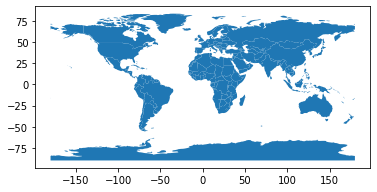

In [256]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.plot()

In [257]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [258]:
len(world['iso_a3'])

177

# Named Entity Recognition with [SpaCy](https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da)

In [259]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [260]:
import re
unclogged = re.sub('[-:;,]', ' ', df['address'][0])
print(unclogged)

Street 13  Wazir Akbar Khan  Kabul  Afghanistan 60  C  Nazim Ud Din Road  F 8/4  Islamabad  Pakistan 


In [261]:
doc = nlp(unclogged)

print([(X.text, X.label_) for X in doc.ents])

[('13', 'CARDINAL'), ('Wazir Akbar Khan', 'PERSON'), ('Kabul', 'GPE'), ('Afghanistan', 'GPE'), ('60', 'CARDINAL'), ('8/4', 'CARDINAL'), ('Islamabad', 'GPE'), ('Pakistan', 'GPE')]


In [266]:
gpe_names = []

for i in range(len(doc.ents)):
  if doc.ents[i].label_ == 'GPE':
    if str(doc.ents[i]) in list(world.name):
      gpe_names.append(str(doc.ents[i]))

gpe_names != []

# str(doc.ents[3])

True

In [263]:
# We'll be looking to stratify the subsample selection of each entity type by
# NATION of origin, so we need to find columns that contain nationof origin
# data. GPE is the label that SpaCy's NLP gives to Countries, cities, states.
# Therefore, we need to count the frequency and diversity of of GPE entities in
#each column

labels = [x.label_ for x in doc.ents]
Counter(labels)

Counter({'CARDINAL': 3, 'GPE': 4, 'PERSON': 1})

In [215]:
df_air_pop = df_air.dropna(axis=1, how='all')
col_popped = df_air_pop.iloc[:,1].dropna()
col_popped.iloc[0]

'N200VR'

In [271]:
def gpe_count(df):
  rows_w_nationhood = []
  num_unique_nations = []
  unique_nations = []
  df_pop_col = df.dropna(axis=1, how='all')

  for x in range(df_pop_col.shape[1]):
    col_pop = df_pop_col.iloc[:,x].dropna()
    # labels_list = []
    n = 0
    this_col_unique_nations = []
    for y in range(len(col_pop)):
      unclogged = re.sub('[-:;,]', ' ', str(col_pop.iloc[y]))
      doc = nlp(unclogged)
      gpe_names = []
      for i in range(len(doc.ents)):
        if doc.ents[i].label_ == 'GPE':
          if str(doc.ents[i]) in list(world.name):
            gpe_names.append(str(doc.ents[i]))
      if gpe_names != []:
        n += 1
        for nation in gpe_names:
          if nation not in this_col_unique_nations:
            this_col_unique_nations.append(nation)
    rows_w_nationhood.append(n)
    num_unique_nations.append(len(this_col_unique_nations))
    unique_nations.append(this_col_unique_nations)
  
  gpe_df = pd.DataFrame(
      {
    'Feature':df_pop_col.columns, 'rows_w_nationhood': rows_w_nationhood,
    'num_unique_nations': num_unique_nations, 'unique_nations': unique_nations
    }
  )
  gpe_most = gpe_df.sort_values(by=['rows_w_nationhood'], ascending=False)
  gpe_notnull = gpe_most[gpe_most['rows_w_nationhood'] != 0]

  return gpe_notnull


In [272]:
df_air_count = gpe_count(df_air)
df_air_count

,Feature,rows_w_nationhood,num_unique_nations,unique_nations
5,aircraft_operator,69,1,[Iran]
3,additional_sanctions_information,16,1,[North Korea]
14,nationality_of_registration,2,1,[Russia]


In [276]:
%%time

df_ves_count = gpe_count(df_ves)
print(df_ves_count())

                             Feature  ...                             unique_nations
10                former_vessel_flag  ...  [Panama, Tanzania, Greece, Iran, Bolivia]
3   additional_sanctions_information  ...                              [North Korea]
2                            address  ...                    [Spain, Cyprus, Panama]
9                        vessel_flag  ...           [Iraq, Greece, Honduras, Jordan]
5                   vessel_call_sign  ...                                     [Iran]
15                               nka  ...                                 [Honduras]

[6 rows x 4 columns]
CPU times: user 5min 49s, sys: 73.4 ms, total: 5min 49s
Wall time: 5min 49s


In [281]:
df_ves_count

,Feature,rows_w_nationhood,num_unique_nations,unique_nations
10,former_vessel_flag,360,5,"[Panama, Tanzania, Greece, Iran, Bolivia]"
3,additional_sanctions_information,103,1,[North Korea]
2,address,11,3,"[Spain, Cyprus, Panama]"
9,vessel_flag,6,4,"[Iraq, Greece, Honduras, Jordan]"
5,vessel_call_sign,2,1,[Iran]
15,nka,1,1,[Honduras]


In [284]:
df_ves['former_vessel_flag'].unique()

array([None, 'Panama', 'Malta;Tanzania', 'Malta;Tanzania;Panama',
       'Liberia;Mongolia', 'Liberia;Mongolia;Panama',
       'Malta;Tuvalu;Tanzania', 'Malta;Tuvalu;Tanzania;Panama', 'Greece',
       'Tanzania;Trinidad and Tobago',
       'Malta;Tuvalu;None Identified;Tanzania', 'Tuvalu;Malta',
       'Cyprus;Tanzania', 'Tanzania', 'Liberia',
       'Malta;Tuvalu;None Identified;Seychelles', 'Malta',
       'Malta;Tuvalu;Seychelles', 'Tuvalu;Malta;Tanzania',
       'Cyprus;Tuvalu;Tanzania', 'Iran', 'Cyprus;Tuvalu',
       'Tuvalu;Tanzania', 'Panama;Mongolia',
       'Malta;Tuvalu;None Identified', 'Malta;Tuvalu', 'Bolivia',
       'Moldova', 'Hong Kong', 'Sierra Leone', 'Barbados', 'Cyprus',
       'Tuvalu'], dtype=object)

In [291]:
clogged = 'Liberia;Mongolia;Panama'
unclogged = re.sub('[-:;,]', " ", clogged)
unclogged.split()
# doc = nlp(unclogged)

# print([(X.text, X.label_) for X in doc.ents])

['Liberia', 'Mongolia', 'Panama']